### Introduction

Following on from the February analysis of callsheets ..

### Method

Looking at 

### Callsheets

As before we start by importing the packages we need for our analysis

In [37]:
# Standard Imports
import numpy as np
import pandas as pd

In [38]:
# Stats Imports
from scipy import stats

In [39]:
# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
%matplotlib inline

Next lets read in our first 3 datasets, the 2014 2015 and 2015 aggreagated data (by month) from some csv files create in informer. This data focuses just on stratum callsheet work. It excludes project callsheets as the majority are for milestone or money tracking only. Analysis of project work will be done later.

In [41]:
cs_agg_2014_df = pd.read_csv('data/Callsheet Aggregates - 2014.csv')
cs_agg_2015_df = pd.read_csv('data/Callsheet Aggregates - 2015.csv')
cs_agg_2016_df = pd.read_csv('data/Callsheet Aggregates - 2016.csv')

Now lets see an example of the aggregated data for 2014 in tabular format.

In [42]:
cs_agg_2014_df

,Closed Month,Time Hours Total (Total),Time Hours Estimated (Total),Quote Time (Total),Count
0,1,498.48,1.0,152,204
1,2,578.73,0.0,160,179
2,3,303.19,0.0,55,157
3,4,243.26,0.0,95,139
4,5,368.58,0.0,135,172
5,6,437.10,0.0,155,138
6,7,1011.67,0.0,81,138
7,8,216.22,0.0,53,184
8,9,261.65,0.0,260,184
9,10,1086.54,0.0,161,175


#### Comparison of Callsheets Closed

We have similar data for 2015 and the first 2 months of 2016.  We can therefore simply compare the raw count of callsheets for each year by forming a simple bar chart of the information as follows.

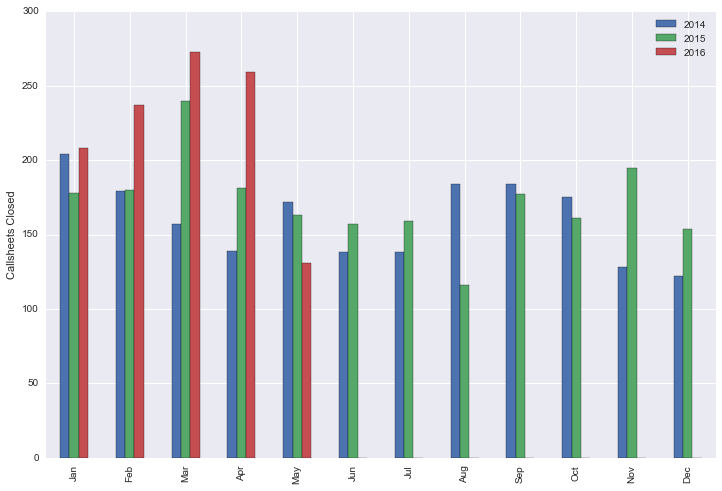

In [43]:
df14 = cs_agg_2014_df[['Count']]
df15 = cs_agg_2015_df[['Count']]
df16 = cs_agg_2016_df[['Count']]
df = pd.concat([df14, df15, df16], axis=1, join='outer')
df.columns = ['2014', '2015' , '2016']
ax = df.plot(kind='bar' , figsize=(12, 8))
ax.set_ylabel('Callsheets Closed')
ax.set_xticklabels(('Jan', 'Feb', 'Mar', 'Apr', 'May' , 'Jun' , 'Jul' , 'Aug' , 'Sep' , 'Oct' , 'Nov' , 'Dec'));


So just looking and pure number of callsheets we are, so far closing more calls tan at the same point in the previous 2 years. We are still straining our 3 new developers so I would expect this to improve steadily over the next 3 - 6 months.

This alone though is again, is not the full picture, how do we know these callsheets were a similar amount of work as previous years ?

#### Comparison of Callsheets Total Hours at Completion

What might be nice is to see that the estimates of work effort to complete these jobs has also gone up. eg. We have completed more callsheets than ever before and they were also of similar difficulty, therefore, more work done in total. Unfortunately the estimation data recorded ranges between sparse and none existent, particularly prior to 2016. So the next thing I looked at was total time spent on callsheets at the point of completion.

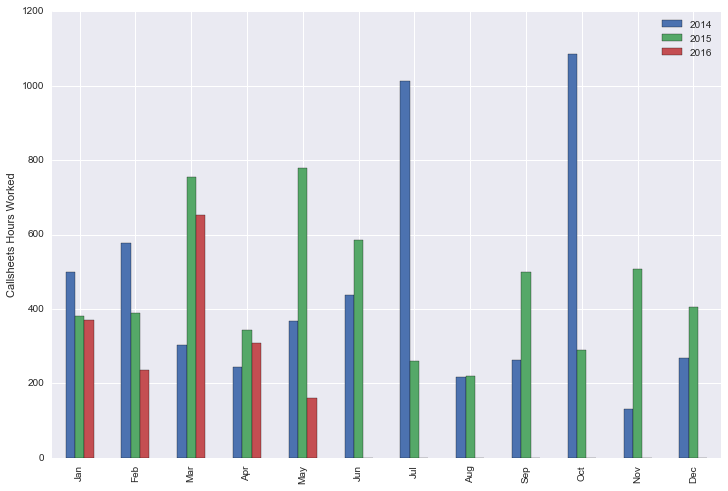

In [44]:
df14 = cs_agg_2014_df[['Time Hours Total (Total)']]
df15 = cs_agg_2015_df[['Time Hours Total (Total)']]
df16 = cs_agg_2016_df[['Time Hours Total (Total)']]
df = pd.concat([df14, df15, df16], axis=1, join='outer')
df.columns = ['2014', '2015' , '2016']
ax = df.plot(kind='bar' , figsize=(12, 8))
ax.set_ylabel('Callsheets Hours Worked')
ax.set_xticklabels(('Jan', 'Feb', 'Mar', 'Apr', 'May' , 'Jun' , 'Jul' , 'Aug' , 'Sep' , 'Oct' , 'Nov' , 'Dec'));

We can see that so far we are spending a similar amount of time on callsheets we have closed, (although february looks low the month is still not complete). This suggests that we are either more efficient in closing the callsheets faster with less effort, or the callsheets were for smaller jobs, again accurate estimate recording here would help shed some light if we had it. As we have not another it is worth looking at quotable work.

### Conclusion

In conclusion I think we have found a reasonable way of measuring how we are dealing with callsheets. We will use the 'Comparison of Callsheets Closed' to determine our production , we will ensure we are supplying a good customer service using the 'Callsheet Duration' histograms.

For projects I think we need to look at raw project hours completed, and also look to have callsheets for the milestones and for master callsheet that have both estimates and accurate time logged. We will need to be able to isolate these from all other callsheets project or otherwise. If we are confident in our estimates we can then use this data as the metric of "quantity" of project work completed, and by having it at milestone level we should get more datapoints than just looking at when master calls close.

Until this data is collected however the best we can probably do is simply use the time logged on project calls each month to determine the capacity we have to do project work (even though it could be spent inefficiently). 

By looking to see a consitent level of throughput is maintained on callsheets, and seeing that more time is logged against projects than previously, we can be confident our throughput overall has improved.

If we see a dip in the callsheet metrics or we are having to sacrifice project time logged compared to previous years to maintain a level then we will cannt consider that our production has improved.

## Callsheet Duration Analysis

* Comparison of Total Duration of Callsheets
* Comparison of Days Callsheets are With APT
* The Relationship Between Total Hours Worked and Duration
* The Relationship Between Total Hours Worked and Days With APT
* The relationship Between Duration and Profitablitiy on Chargeable Callsheets



In [45]:
df = pd.read_csv('data/Callsheet Detail.csv')
df.tail(2)

,Call No,Taken Date,Closed Date,Closed Year,Days With APT,Days With Customer,Total Days,Chargeable,Project Work,Quote Time,Quote Amount,Time Hours Estimated,Time Hours Total,Net Time
12214,158256,2013-01-09,2013-01-09,2013,0,0,0,N,N,0,0,0.0,0.32,0
12215,158257,2013-01-09,2013-03-13,2013,45,0,45,N,N,0,0,0.0,3.57,-4


In [46]:
df = df[df['Project Work'] != 'Y']
df = df[df['Total Days'] < 365]
df = df[df['Days With APT'] > 0]
df = df[df['Days With APT'] < 700]
df_quoted = df[df['Quote Time'] > 0]

### Total Duration of Callsheets

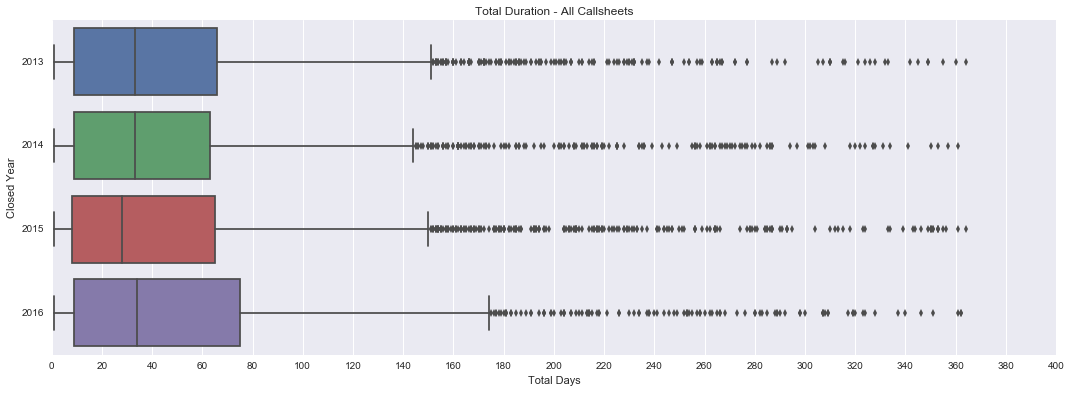

In [47]:
plt.figure(figsize=(18, 6));
ax = sns.boxplot(y="Closed Year", x="Total Days", data=df, orient="h", )
ax.set_xticks(np.linspace(0,400,21));
ax.set_title("Total Duration - All Callsheets");

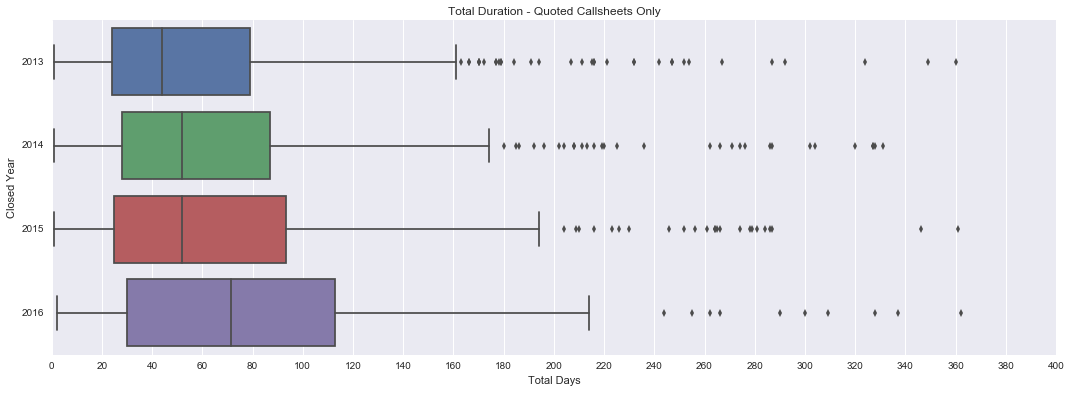

In [48]:
plt.figure(figsize=(18, 6));
ax = sns.boxplot(y="Closed Year", x="Total Days", data=df_quoted, orient="h", )
ax.set_xticks(np.linspace(0,400,21));
ax.set_title("Total Duration - Quoted Callsheets Only");

### Days Callsheets are With APT

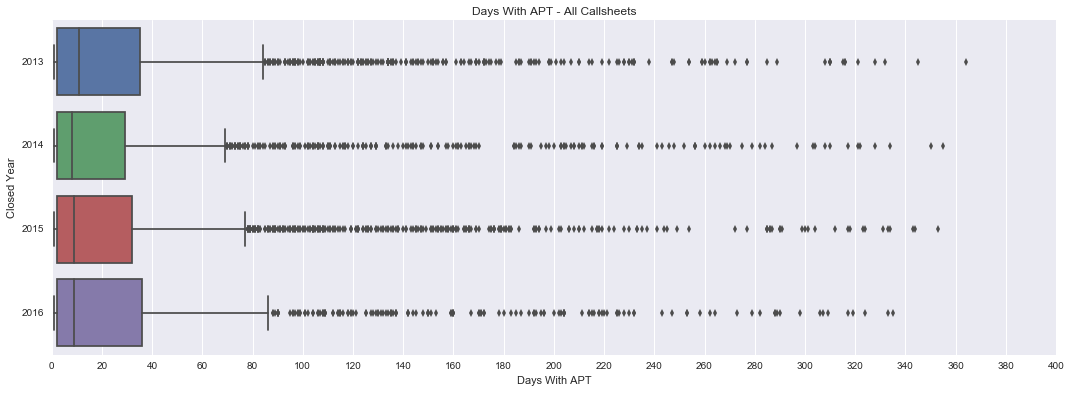

In [49]:
plt.figure(figsize=(18, 6));
ax = sns.boxplot(y="Closed Year", x="Days With APT", data=df, orient="h")
ax.set_xticks(np.linspace(0,400,21));
ax.set_title("Days With APT - All Callsheets");

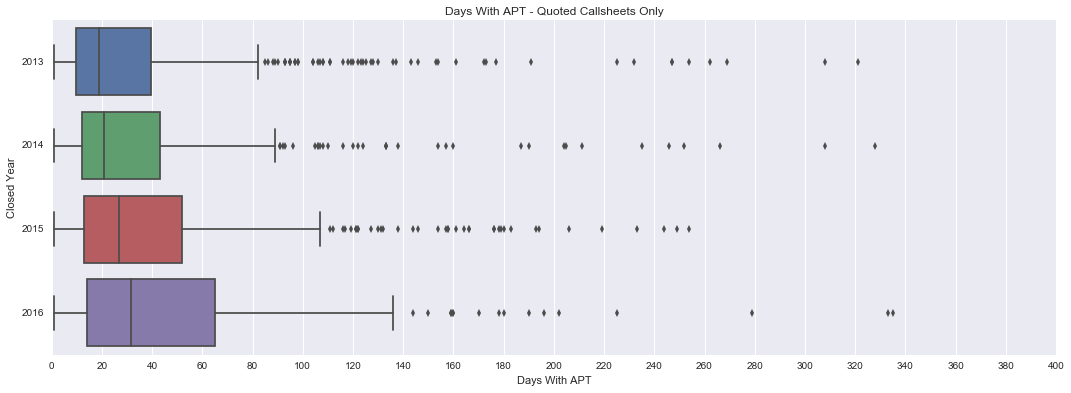

In [106]:
plt.figure(figsize=(18, 6));
ax = sns.boxplot(y="Closed Year", x="Days With APT", data=df_quoted, orient="h")
ax.set_xticks(np.linspace(0,400,21));
ax.set_title("Days With APT - Quoted Callsheets Only");

### Callsheet Estimation

In [114]:
df_est = df[df['Time Hours Estimated'] > 0]
df_est = df_est[df_est['Time Hours Total'] > 0]
df_est_14 = df_est[df_est['Closed Year'] == 2014]
df_est_15 = df_est[df_est['Closed Year'] == 2015]
df_est_16 = df_est[df_est['Closed Year'] == 2016]

In [115]:
# The mean of all of the values for 2015
df_est_15['Net Time'].mean()

-1.8669201520912548

In [116]:
# The standard deviation of all of the values for 2015
df_est_15['Net Time'].std()

9.932663020399207

In [117]:
# The mean of all of the values for 2016
df_est_16['Net Time'].mean()

-1.432

In [118]:
# The standard deviation of all of the values for 2016
df_est_16['Net Time'].std()

2.8941988695965923